# Politic_ES

Análisis inicial de los datos

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Visualización

In [2]:
%matplotlib inline

c_gender = {'male': 'blue', 'female': 'pink'}
c_profession = {'politician': 'gray', 'celebrity': 'yellow', 'journalist': 'orange'}
c_i_bin = {'left': 'red', 'right': 'blue'}
c_i_mul = {'left': 'red', 'moderate_left': 'lightcoral', 'moderate_right': 'turquoise', 'right': 'blue'}

## Seed para repetición

In [3]:
seed = 69420
np.random.seed(seed)

## Dataset

In [4]:
df = pd.read_csv(os.path.join("../practise_data/", "politicES_phase_2_train_public.csv"))
df

label  gender  profession ideology_binary  \
0       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
1       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
2       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
3       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
4       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
...                                  ...     ...         ...             ...   
179995  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179996  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179997  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179998  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179999  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   

       ideology_multiclass                                              tweet  
0                     left  ¡Feliz 28 de febrero a todas las andaluzas y a...  
1                     left  Feliz año nuevo, feliz esperanza 💕. Querido 20...  
2                     left  🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...  
3                     left  El conflicto en Ucrania ha supuesto una dramát...  
4                     left  La Academia de la Llingua Asturiana realiza un...  
...                    ...                                                ...  
179995                left  Desde un inicio nos opusimos a la escalda mili...  
179996                left  En menos de 4 minutos he tratado de analizar e...  
179997                left  Un fantasma recorre Euskal Herria y el Estado....  
179998                left  Aquí os dejo mis reflexiones hoy en el diario ...  
179999                left  No se trata de sobreactuar o "condenar" unas p...  

[180000 rows x 6 columns]

In [5]:
# Ordenamos las variables categóricas a nuestro gusto, principalmente por motivos visuales de izquierda a derecha
df.ideology_binary = pd.Categorical(df.ideology_binary, ['left', 'right'])
df.ideology_multiclass = pd.Categorical(df.ideology_multiclass, ['left', 'moderate_left', 'moderate_right', 'right'])

# Analysis de los datos obtenidos

In [6]:
df[["gender", "ideology_binary", "profession",  "label"]].groupby(["gender", "profession", "ideology_binary"]).count()

label
gender profession ideology_binary       
female celebrity  left              3040
                  right              640
       journalist left             22080
                  right            10720
       politician left             14240
                  right             9840
male   celebrity  left              3920
                  right             1440
       journalist left             36720
                  right            41280
       politician left             20400
                  right            15680

### Gender

Text(0.5, 1.0, 'Gender distribution')

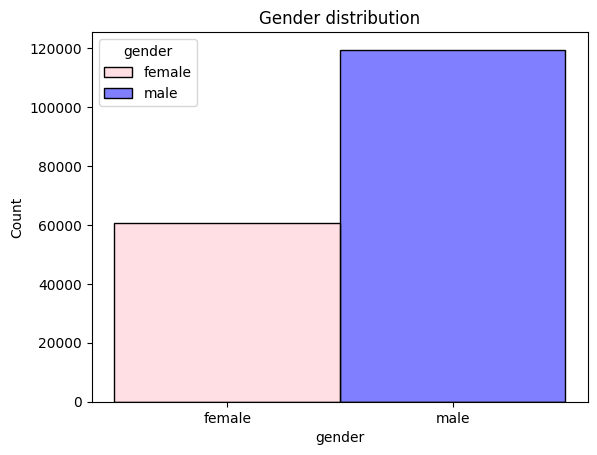

In [7]:
ax = sns.histplot(df, x="gender", hue="gender", palette=c_gender)
ax.set_title("Gender distribution")

### Profession

Text(0.5, 1.0, 'Profession distribution')

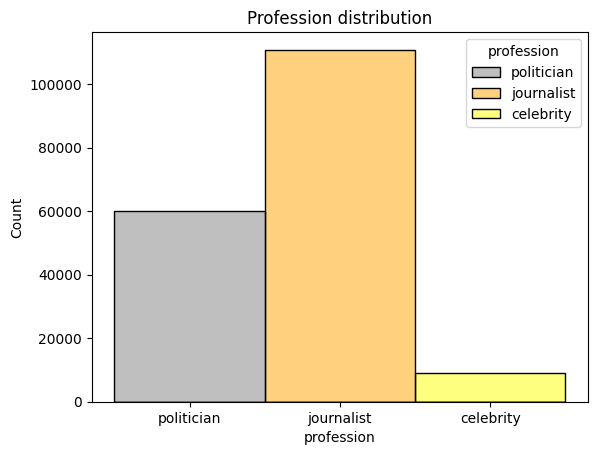

In [8]:
ax = sns.histplot(df, x="profession", hue="profession", palette=c_profession)
ax.set_title("Profession distribution")

### Ideology binary

Text(0.5, 1.0, 'Ideology binary distribution')

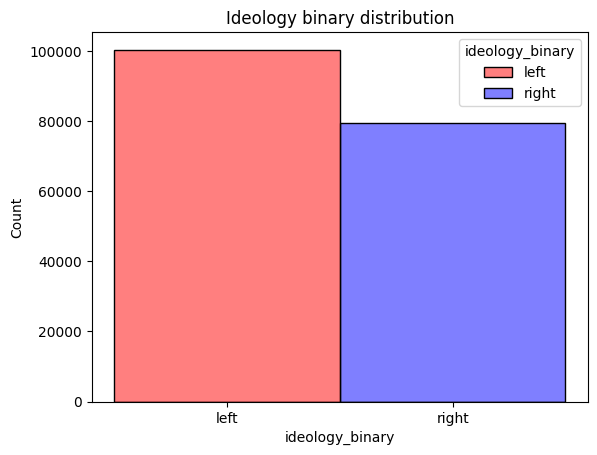

In [9]:
ax = sns.histplot(df, x="ideology_binary", hue="ideology_binary", palette=c_i_bin)
ax.set_title("Ideology binary distribution")

### Ideology multiclass

Text(0.5, 1.0, 'Ideology multiclass distribution')

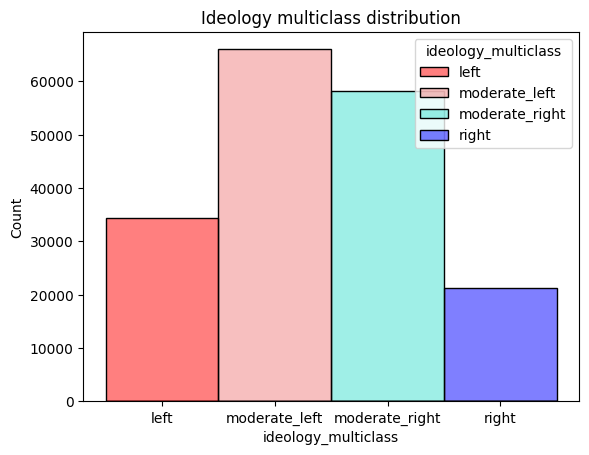

In [10]:
ax = sns.histplot(df, x="ideology_multiclass", hue="ideology_multiclass", palette=c_i_mul)
ax.set_title("Ideology multiclass distribution")

# Separación en train y test

In [10]:
# Separamos en training y en test
parte_test = 0.3
df_train, df_test = np.split(df, [int((1 - parte_test) * len(df))])

In [11]:
df_train

label  gender  profession ideology_binary  \
0       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
1       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
2       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
3       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
4       0008c4fab9e97623a60380ee9c88cb20  female  politician            left   
...                                  ...     ...         ...             ...   
125994  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   
125995  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   
125996  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   
125997  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   
125998  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   

       ideology_multiclass                                              tweet  
0                     left  ¡Feliz 28 de febrero a todas las andaluzas y a...  
1                     left  Feliz año nuevo, feliz esperanza 💕. Querido 20...  
2                     left  🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...  
3                     left  El conflicto en Ucrania ha supuesto una dramát...  
4                     left  La Academia de la Llingua Asturiana realiza un...  
...                    ...                                                ...  
125994       moderate_left  Pero qué cosa tan hermosa es este episodio sob...  
125995       moderate_left  @user vaya fichaje que han hecho estos maldito...  
125996       moderate_left  Por si quedaban dudas, Lula ganó en el 'Ohio' ...  
125997       moderate_left  Las ausencias de los máximos responsables polí...  
125998       moderate_left         @user ¿No te gustó la Dra. Yves o Heather?  

[125999 rows x 6 columns]

In [12]:
df_test

label  gender  profession ideology_binary  \
125999  b75a1185a34e920e0b23b9e87acde174  female  journalist            left   
126000  b764da399179ff2948719066391eaecf  female  journalist           right   
126001  b764da399179ff2948719066391eaecf  female  journalist           right   
126002  b764da399179ff2948719066391eaecf  female  journalist           right   
126003  b764da399179ff2948719066391eaecf  female  journalist           right   
...                                  ...     ...         ...             ...   
179995  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179996  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179997  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179998  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   
179999  ffd89e81d6f6c783bfb72a4590db4304    male  politician            left   

       ideology_multiclass                                              tweet  
125999       moderate_left  Qué petición tan simple la que hace la cantant...  
126000      moderate_right  He ido a ver Cyrano de Bergerac, de la compañí...  
126001      moderate_right  Brutal esta entrevista de ⁦@user ⁩ a a una ucr...  
126002      moderate_right  Cuando llegué a Madrid, mi compañera de piso d...  
126003      moderate_right  4/ Mientras algunos quieren presentar a Shakir...  
...                    ...                                                ...  
179995                left  Desde un inicio nos opusimos a la escalda mili...  
179996                left  En menos de 4 minutos he tratado de analizar e...  
179997                left  Un fantasma recorre Euskal Herria y el Estado....  
179998                left  Aquí os dejo mis reflexiones hoy en el diario ...  
179999                left  No se trata de sobreactuar o "condenar" unas p...  

[54001 rows x 6 columns]

# CNN

In [26]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

y_train = df_train['ideology_binary'].tolist()
y_test = df_test['ideology_binary'].tolist()

LABELS = sorted(set(y_test))
print('Conjunto de etiquetas:', LABELS)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Conjunto de etiquetas: ['left', 'right']


In [48]:
#Multiclass
y_train_m = df_train['ideology_multiclass'].tolist()
y_test_m = df_test['ideology_multiclass'].tolist()

LABELS_m = sorted(set(y_test_m))
print('Conjunto de etiquetas:', LABELS_m)

le = LabelEncoder()
y_train_m = le.fit_transform(y_train_m)
y_test_m = le.transform(y_test_m)

Conjunto de etiquetas: ['left', 'moderate_left', 'moderate_right', 'right']


In [62]:
y_train_p = df_train['profession'].tolist()
y_test_p = df_test['profession'].tolist()

LABELS_p = sorted(set(y_test_p))
print('Conjunto de etiquetas:', LABELS_p)

le_p = LabelEncoder()
y_train_p = le_p.fit_transform(y_train_p)
y_test_p = le_p.transform(y_test_p)

Conjunto de etiquetas: ['celebrity', 'journalist', 'politician']


In [63]:
y_train_g = df_train['gender'].tolist()
y_test_g = df_test['gender'].tolist()

LABELS_g = sorted(set(y_test_g))
print('Conjunto de etiquetas:', LABELS_g)

le_g = LabelEncoder()
y_train_g = le_g.fit_transform(y_train_g)
y_test_g = le_g.transform(y_test_g)

Conjunto de etiquetas: ['female', 'male']


In [28]:
X_train = df_train['tweet'].tolist()
X_test = df_test['tweet'].tolist()

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token = True)
tokenizer.fit_on_texts(X_train)
tokenizer.word_index[''] = 0

NUM_WORDS=len(tokenizer.word_index)
print("Tamaño del vocabulario ={}".format(NUM_WORDS))

from keras.utils import pad_sequences 

MAX_LEN=60

encoded_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen = MAX_LEN, padding='post')
encoded_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen = MAX_LEN, padding='post')

Tamaño del vocabulario =121789


In [30]:
import tensorflow as tf 
# asegurar que los experimentos se pueden reproducir
tf.random.set_seed(42)

tf.__version__

'2.12.0-rc0'

In [31]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\manfe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
#model_we =  KeyedVectors.load_word2vec_format("model.bin", binary=True) 

In [38]:
import gensim.downloader as api
import numpy as np


model_we = api.load("glove-wiki-gigaword-50")
#model_we = api.load("word2vec-google-news-300")     
#EMBED_SIZE = 300


EMBED_SIZE = 50

# creamos una matriz para los textos del conjunto de entrenamiento
embedding_matrix = np.zeros((NUM_WORDS, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = model_we[word]
        # word embedding para la palabra con índice i
        embedding_matrix[i] = embedding_vector
    except:
        #if word does not exist, we do not udpate the matrix
        pass

print('matriz creada')


matriz creada


In [40]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Conv1D, MaxPooling1D

model = Sequential()

model.add(Embedding(NUM_WORDS, EMBED_SIZE, 
                    input_length=MAX_LEN, weights=[embedding_matrix],))

model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Para clasificación binaria
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 60, 50)            6089450   
                                                                 
 conv1d_15 (Conv1D)          (None, 60, 128)           25728     
                                                                 
 conv1d_16 (Conv1D)          (None, 60, 64)            32832     
                                                                 
 conv1d_17 (Conv1D)          (None, 60, 32)            8224      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 960)               0         
                                                      

In [64]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Conv1D, MaxPooling1D

model_g = Sequential()

model_g.add(Embedding(NUM_WORDS, EMBED_SIZE, 
                    input_length=MAX_LEN, weights=[embedding_matrix],))

model_g.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model_g.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model_g.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_g.add(MaxPooling1D(pool_size=2))

model_g.add(Flatten())
model_g.add(Dense(256, activation='relu'))
# Para clasificación binaria
model_g.add(Dense(1, activation='sigmoid'))
model_g.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_g.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 50)            6089450   
                                                                 
 conv1d_24 (Conv1D)          (None, 60, 128)           25728     
                                                                 
 conv1d_25 (Conv1D)          (None, 60, 64)            32832     
                                                                 
 conv1d_26 (Conv1D)          (None, 60, 32)            8224      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 960)               0         
                                                      

In [50]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Conv1D, MaxPooling1D

model_m = Sequential()

model_m.add(Embedding(NUM_WORDS, EMBED_SIZE, input_length=MAX_LEN, weights=[embedding_matrix]))

model_m.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model_m.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model_m.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_m.add(MaxPooling1D(pool_size=2))

model_m.add(Flatten())
model_m.add(Dense(256, activation='relu'))

# For multiclass classification with softmax activation
model_m.add(Dense(4, activation='softmax'))
model_m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_m.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 60, 50)            6089450   
                                                                 
 conv1d_21 (Conv1D)          (None, 60, 128)           25728     
                                                                 
 conv1d_22 (Conv1D)          (None, 60, 64)            32832     
                                                                 
 conv1d_23 (Conv1D)          (None, 60, 32)            8224      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 960)               0         
                                                      

In [65]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Conv1D, MaxPooling1D

model_p = Sequential()

model_p.add(Embedding(NUM_WORDS, EMBED_SIZE, input_length=MAX_LEN, weights=[embedding_matrix]))

model_p.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model_p.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model_p.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_p.add(MaxPooling1D(pool_size=2))

model_p.add(Flatten())
model_p.add(Dense(256, activation='relu'))

# For multiclass classification with softmax activation
model_p.add(Dense(4, activation='softmax'))
model_p.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_p.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 50)            6089450   
                                                                 
 conv1d_27 (Conv1D)          (None, 60, 128)           25728     
                                                                 
 conv1d_28 (Conv1D)          (None, 60, 64)            32832     
                                                                 
 conv1d_29 (Conv1D)          (None, 60, 32)            8224      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 960)               0         
                                                      

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Para el entrenamiento después de 3 epochs sin el error en el conjunto de validación no mejora
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [45]:
epochs = 10 
batch_size = 16 

# training
history=model.fit(encoded_train, y_train, 
                    validation_split=0.2,
                  batch_size=batch_size, epochs=epochs,
                  callbacks=[earlyStopping],
                  )

Epoch 1/10


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000028C5EB90A40>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


 100/6300 [..............................] - ETA: 13:40 - loss: 0.6998 - accuracy: 0.5263

KeyboardInterrupt: 

In [66]:
epochs = 10 
batch_size = 16 

# training
history_g=model_g.fit(encoded_train, y_train_g, 
                    validation_split=0.2,
                  batch_size=batch_size, epochs=epochs,
                  callbacks=[earlyStopping],
                  )

Epoch 1/10
6300/6300 [==============================] - 807s 128ms/step - loss: 0.5956 - accuracy: 0.6915 - val_loss: 0.6153 - val_accuracy: 0.6632
Epoch 2/10
6300/6300 [==============================] - 798s 127ms/step - loss: 0.4852 - accuracy: 0.7657 - val_loss: 0.6242 - val_accuracy: 0.6731
Epoch 3/10
6300/6300 [==============================] - 812s 129ms/step - loss: 0.3647 - accuracy: 0.8367 - val_loss: 0.7295 - val_accuracy: 0.6646
Epoch 4/10
6300/6300 [==============================] - 811s 129ms/step - loss: 0.2704 - accuracy: 0.8819 - val_loss: 0.8037 - val_accuracy: 0.6551


In [51]:
epochs = 10 
batch_size = 16 

# training
history_m=model_m.fit(encoded_train, y_train_m, 
                    validation_split=0.2,
                  batch_size=batch_size, epochs=epochs,
                  callbacks=[earlyStopping],
                  )

Epoch 1/10
6300/6300 [==============================] - 788s 124ms/step - loss: 1.2522 - accuracy: 0.4029 - val_loss: 1.2624 - val_accuracy: 0.3852
Epoch 2/10
6300/6300 [==============================] - 895s 142ms/step - loss: 1.1048 - accuracy: 0.5031 - val_loss: 1.2085 - val_accuracy: 0.4519
Epoch 3/10
6300/6300 [==============================] - 920s 146ms/step - loss: 0.8944 - accuracy: 0.6245 - val_loss: 1.2817 - val_accuracy: 0.4653
Epoch 4/10
6300/6300 [==============================] - 789s 125ms/step - loss: 0.7000 - accuracy: 0.7191 - val_loss: 1.3981 - val_accuracy: 0.4662
Epoch 5/10
6300/6300 [==============================] - 786s 125ms/step - loss: 0.5329 - accuracy: 0.7927 - val_loss: 1.5689 - val_accuracy: 0.4719


In [67]:
epochs = 10 
batch_size = 16 

# training
history_p=model_p.fit(encoded_train, y_train_p, 
                    validation_split=0.2,
                  batch_size=batch_size, epochs=epochs,
                  callbacks=[earlyStopping],
                  )

Epoch 1/10
6300/6300 [==============================] - 774s 123ms/step - loss: 0.6655 - accuracy: 0.7266 - val_loss: 0.6146 - val_accuracy: 0.7538
Epoch 2/10
6300/6300 [==============================] - 757s 120ms/step - loss: 0.4989 - accuracy: 0.8077 - val_loss: 0.6136 - val_accuracy: 0.7566
Epoch 3/10
6300/6300 [==============================] - 746s 118ms/step - loss: 0.3740 - accuracy: 0.8569 - val_loss: 0.6702 - val_accuracy: 0.7492
Epoch 4/10
6300/6300 [==============================] - 798s 127ms/step - loss: 0.2692 - accuracy: 0.8979 - val_loss: 0.8134 - val_accuracy: 0.7375
Epoch 5/10
6300/6300 [==============================] - 811s 129ms/step - loss: 0.1879 - accuracy: 0.9301 - val_loss: 0.9213 - val_accuracy: 0.7297


In [52]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Curva de a  the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'red', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'red', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

NameError: name 'history' is not defined

In [ ]:
loss, accuracy = model.evaluate(encoded_test, y_test, batch_size=batch_size)

3376/3376 [==============================] - 19s 6ms/step - loss: 1.1145 - accuracy: 0.6782


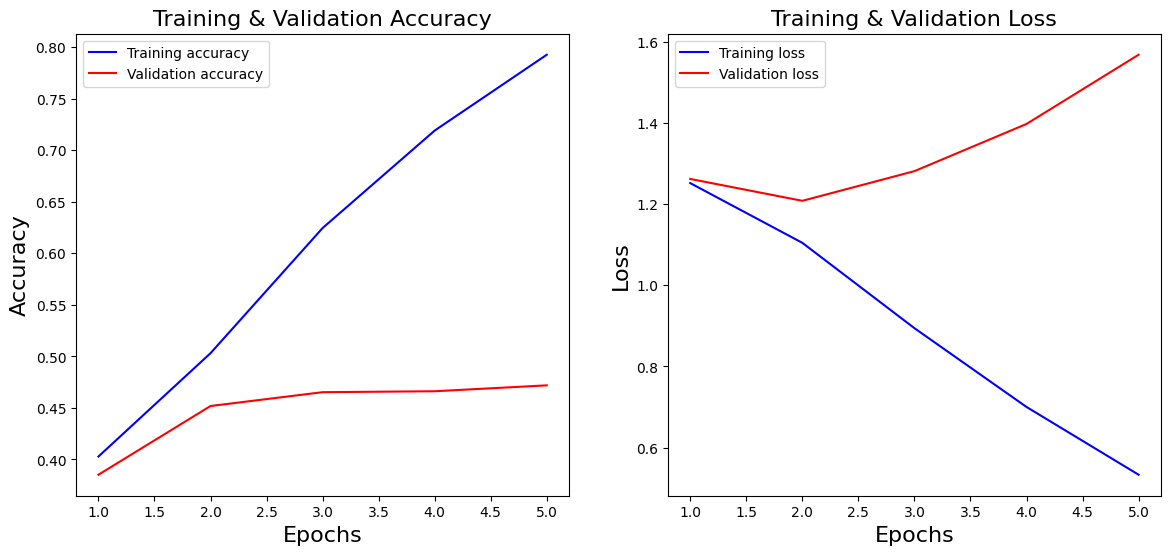

In [54]:
import matplotlib.pyplot as plt

history_dict_m = history_m.history
loss_values_m = history_dict_m['loss']
val_loss_values_m  = history_dict_m['val_loss']
accuracy_m  = history_dict_m['accuracy']
val_accuracy_m  = history_dict_m['val_accuracy']
 
epochs = range(1, len(loss_values_m) + 1)
fig_m , ax_m  = plt.subplots(1, 2, figsize=(14, 6))
#
# Curva de a  the model accuracy vs Epochs
#
ax_m[0].plot(epochs, accuracy_m , 'b', label='Training accuracy')
ax_m[0].plot(epochs, val_accuracy_m , 'red', label='Validation accuracy')
ax_m[0].set_title('Training & Validation Accuracy', fontsize=16)
ax_m[0].set_xlabel('Epochs', fontsize=16)
ax_m[0].set_ylabel('Accuracy', fontsize=16)
ax_m[0].legend()
#
# Plot the loss vs Epochs
#
ax_m[1].plot(epochs, loss_values_m , 'b', label='Training loss')
ax_m[1].plot(epochs, val_loss_values_m , 'red', label='Validation loss')
ax_m[1].set_title('Training & Validation Loss', fontsize=16)
ax_m[1].set_xlabel('Epochs', fontsize=16)
ax_m[1].set_ylabel('Loss', fontsize=16)
ax_m[1].legend()

In [55]:
loss_m, accuracy_m = model_m.evaluate(encoded_test, y_test_m, batch_size=batch_size)

3376/3376 [==============================] - 19s 5ms/step - loss: 1.5108 - accuracy: 0.4840


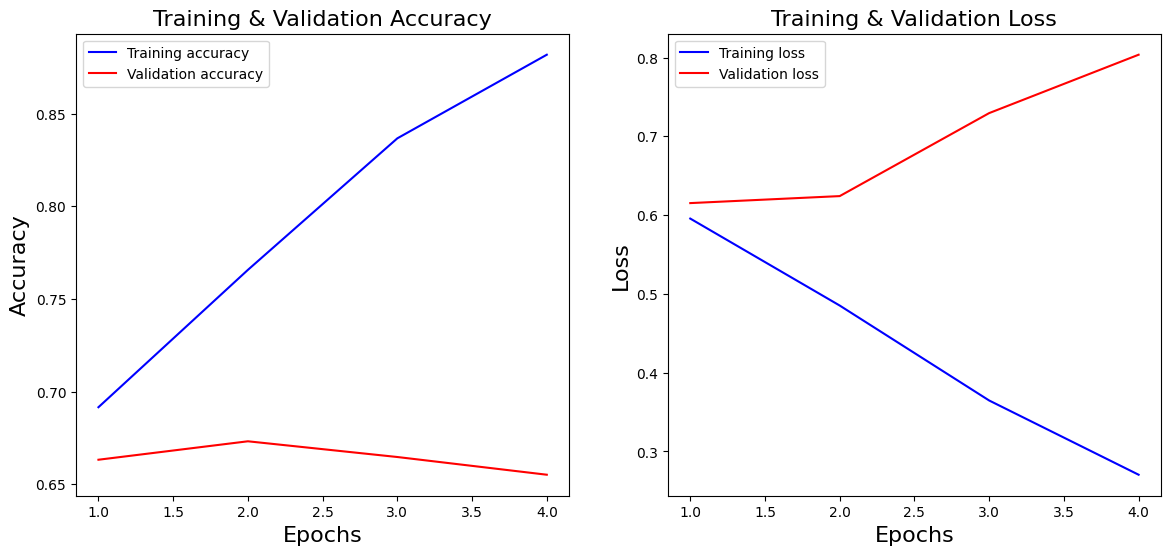

In [69]:
import matplotlib.pyplot as plt

history_dict_g = history_g.history
loss_values_g = history_dict_g['loss']
val_loss_values_g = history_dict_g['val_loss']
accuracy_g = history_dict_g['accuracy']
val_accuracy_g = history_dict_g['val_accuracy']
 
epochs = range(1, len(loss_values_g) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Curva de a  the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy_g, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy_g, 'red', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values_g, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values_g, 'red', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [70]:
loss_g, accuracy_g = model_g.evaluate(encoded_test, y_test_g, batch_size=batch_size)

3376/3376 [==============================] - 20s 6ms/step - loss: 0.7785 - accuracy: 0.6666


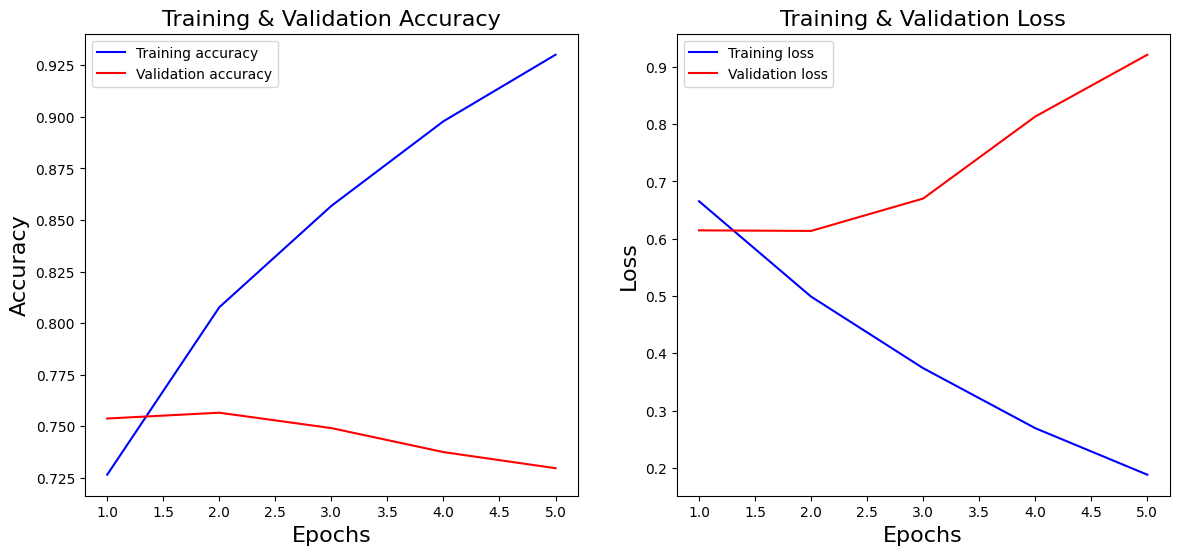

In [71]:
import matplotlib.pyplot as plt

history_dict_p = history_p.history
loss_values_p = history_dict_p['loss']
val_loss_values_p = history_dict_p['val_loss']
accuracy_p = history_dict_p['accuracy']
val_accuracy_p = history_dict_p['val_accuracy']
 
epochs = range(1, len(loss_values_p) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Curva de a  the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy_p, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy_p, 'red', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values_p, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values_p, 'red', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [72]:
loss_p, accuracy_p = model_p.evaluate(encoded_test, y_test_p, batch_size=batch_size)

3376/3376 [==============================] - 19s 5ms/step - loss: 0.8822 - accuracy: 0.7335


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report 
y_pred = np.round(model.predict(encoded_test))

print('accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=LABELS))

1688/1688 [==============================] - 17s 10ms/step
accuracy: 0.6782096627840225
              precision    recall  f1-score   support

        left       0.71      0.73      0.72     30401
       right       0.64      0.61      0.62     23600

    accuracy                           0.68     54001
   macro avg       0.67      0.67      0.67     54001
weighted avg       0.68      0.68      0.68     54001



In [74]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report 
y_pred_g = np.round(model_g.predict(encoded_test))

print('accuracy:', accuracy_score(y_test_g, y_pred_g))
print(classification_report(y_test_g, y_pred_g, target_names=LABELS_g))

1688/1688 [==============================] - 12s 7ms/step
accuracy: 0.6666358030406845
              precision    recall  f1-score   support

      female       0.52      0.44      0.48     18721
        male       0.73      0.79      0.76     35280

    accuracy                           0.67     54001
   macro avg       0.62      0.61      0.62     54001
weighted avg       0.66      0.67      0.66     54001



In [58]:
y_pred_m = np.round(model_m.predict(encoded_test))

print('accuracy:', accuracy_score(y_test_m, y_pred_m))
print(classification_report(y_test_m, y_pred_m, target_names=LABELS_m))

1688/1688 [==============================] - 12s 7ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [59]:
# Reporte de clasificación
y_pred_m = np.argmax(model_m.predict(encoded_test), axis=1)

print('accuracy:', accuracy_score(y_test_m, y_pred_m))
print(classification_report(y_test_m, y_pred_m, target_names=LABELS_m))

1688/1688 [==============================] - 12s 7ms/step
accuracy: 0.48404659172978276
                precision    recall  f1-score   support

          left       0.40      0.30      0.34     10880
 moderate_left       0.51      0.62      0.56     19521
moderate_right       0.50      0.54      0.52     17280
         right       0.43      0.23      0.31      6320

      accuracy                           0.48     54001
     macro avg       0.46      0.42      0.43     54001
  weighted avg       0.47      0.48      0.47     54001



In [73]:
# Reporte de clasificación
y_pred_p = np.argmax(model_p.predict(encoded_test), axis=1)

print('accuracy:', accuracy_score(y_test_p, y_pred_p))
print(classification_report(y_test_p, y_pred_p, target_names=LABELS_p))

1688/1688 [==============================] - 12s 7ms/step
accuracy: 0.733523453269384
              precision    recall  f1-score   support

   celebrity       0.29      0.20      0.24      2400
  journalist       0.79      0.81      0.80     33681
  politician       0.66      0.67      0.67     17920

    accuracy                           0.73     54001
   macro avg       0.58      0.56      0.57     54001
weighted avg       0.73      0.73      0.73     54001



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22259  8142]
 [ 9235 14365]]


In [ ]:
cm_g = confusion_matrix(y_test_g, y_pred_g)
print(cm_g)
# Matriz de confusión

cm_g = confusion_matrix(y_test_g, y_pred_g)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_g, display_labels=LABELS_m)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'left'),
  Text(1, 0, 'moderate_left'),
  Text(2, 0, 'moderate_right'),
  Text(3, 0, 'right')])

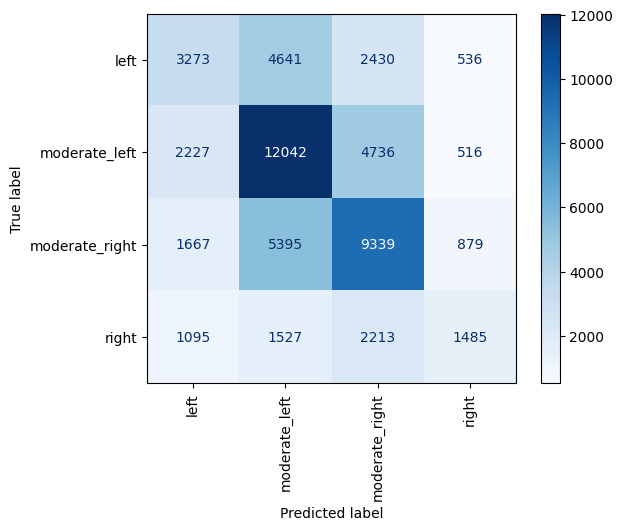

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusión
import sklearn.metrics
cm_m = confusion_matrix(y_test_m, y_pred_m)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_m, display_labels=LABELS_m)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.xticks(rotation=90)

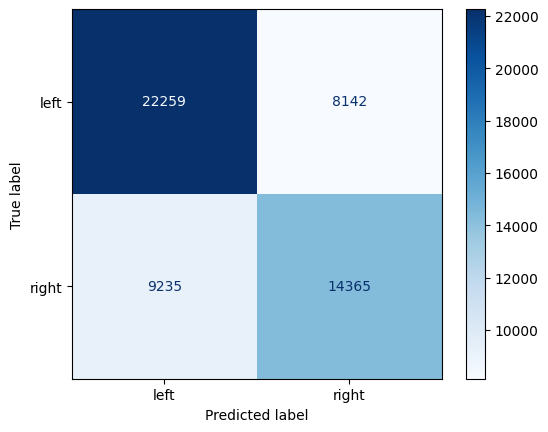

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues,values_format='g')

In [31]:
# Step 3: Evaluate model performance
# Assuming you have already calculated evaluation metrics (accuracy, precision, recall, F1 score)

# Step 4: Analyze incorrect predictions
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
incorrect_samples = [df_test.iloc[i]['tweet'] for i in incorrect_indices]
incorrect_true_labels = [y_test[i] for i in incorrect_indices]
incorrect_predicted_labels = [y_pred[i] for i in incorrect_indices]


c = 0
# Step 5: Investigate the misclassified samples
for sample, true_label, predicted_label in zip(incorrect_samples, incorrect_true_labels, incorrect_predicted_labels):
    # Analyze the misclassified sample and relevant information
    print(f'Sample: {sample}')
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')
    print("---")
    c = c + 1
    #if c == 10:
    #    break

Sample: He ido a ver Cyrano de Bergerac, de la compañía de teatro Paloma Mejía. Una de mis obras favoritas, la he visto ya varias veces en mi vida. Una pasada!. Apoyemos al teatro de proximidad, que además tiene un ciclo de Lorca que tampoco me voy a perder 🎭:
True Label: 1
Predicted Label: [0.]
---
Sample: @user Ay!! 😳 Es que mi madre es una terremoto, no deja a nadie indiferente! Jajajaja. Cuánto me alegro de ese trayecto tan bonito. Mañana se lo comento, a ver si se acuerda.
True Label: 1
Predicted Label: [0.]
---
Sample: Shakira es una mujer extraordinariamente inteligente, y no es ninguna 'pobrecita'. Si ha sacado esa canción es porque es muy lista. Eres cantante y tu público se vuelve loco con que le compartas tu vida. No lo veáis, por favor, como una mujer desvalida, porque no. Bien por ella.
True Label: 1
Predicted Label: [0.]
---
Sample: Bombardean a la población civil porque pierden la guerra. Y lo saben.
True Label: 1
Predicted Label: [0.]
---
Sample: Porque algo sea una pre